### Backpropogation

Chain Rule : <br>

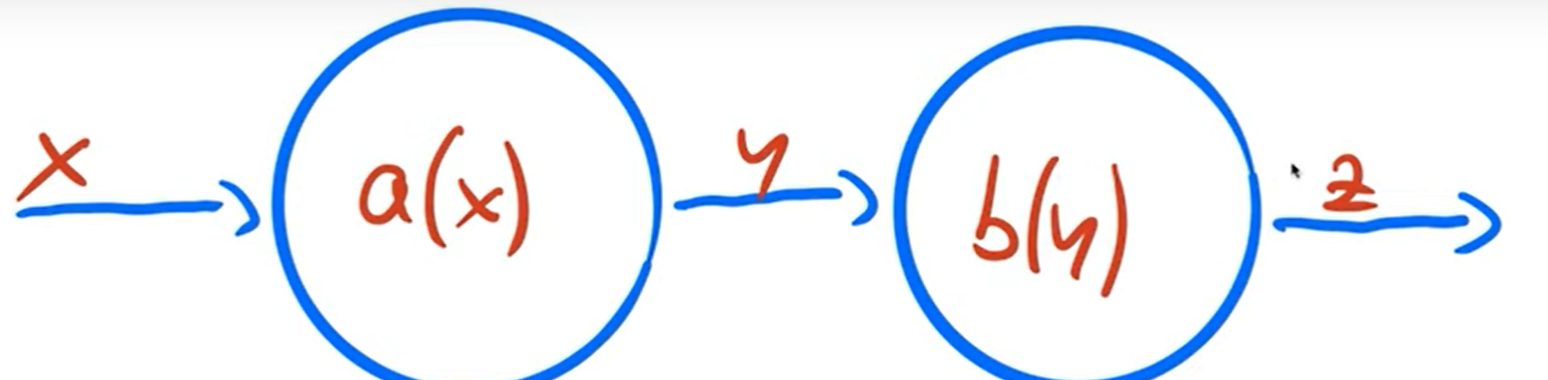
<br>
<br>
x inputs produces output y from the function a(x) which is further an input producing ouput z from function b(y)

We wanna minimize z, so we apply the following
 
<br> _dz/dx = dz/dy * dy/dx_

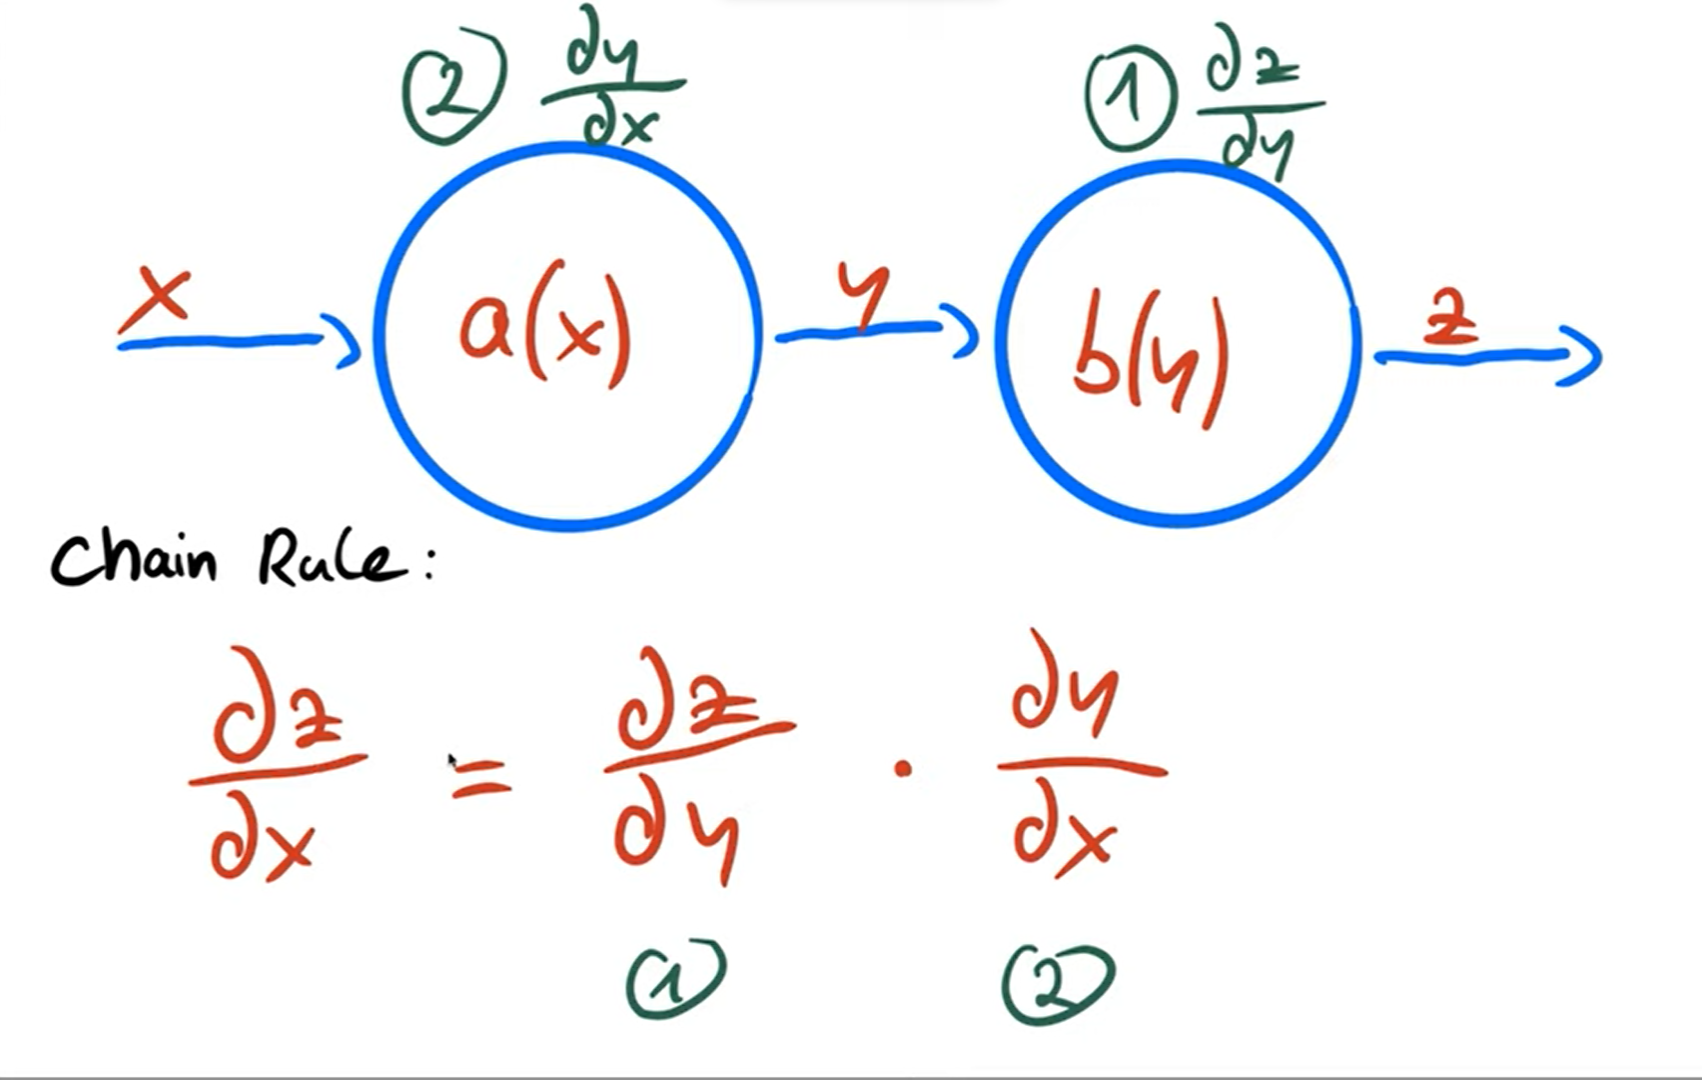

----


For every operation we do with tensors, pytorch creates a graph for each node, this is known as computational graph
<br>
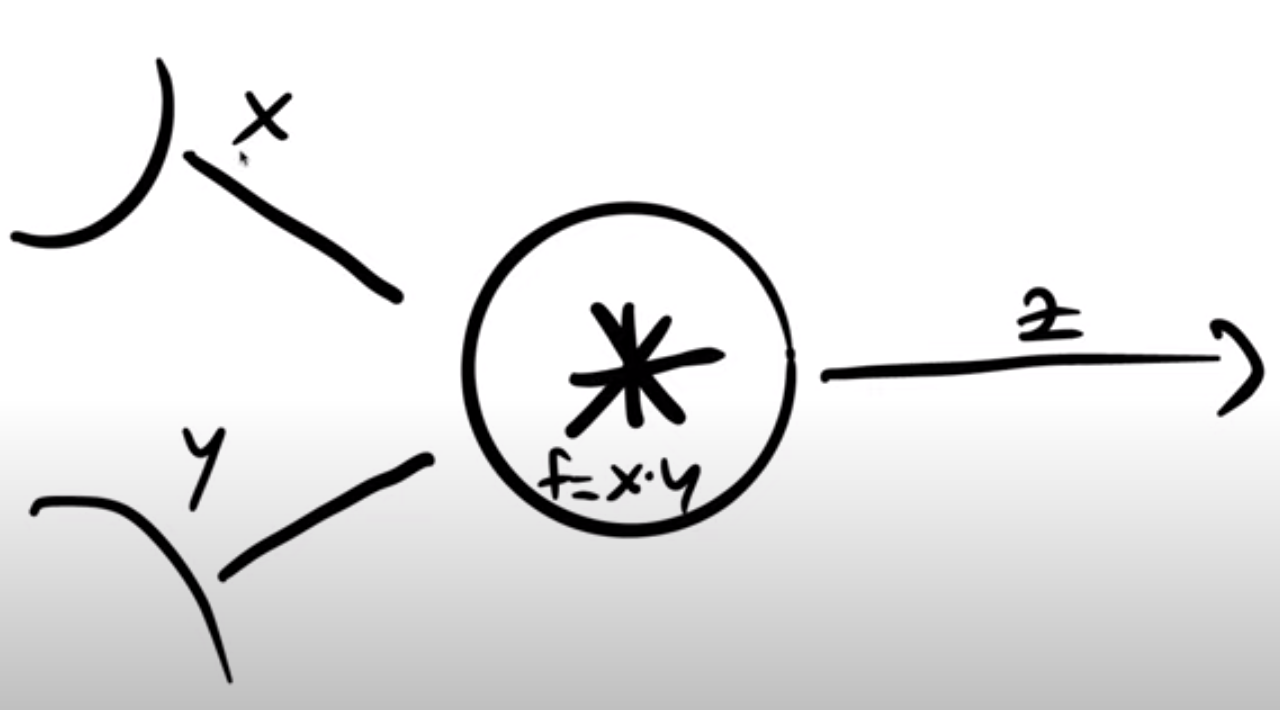
<br>
Suppose we are doing the multiplication operation z = x*y, from these we can calculate local gradients, 
_dz/dx = d(x.y)/dx = y_ & _dz/dy = d(x.y)/dy = x_
<br>
this will help us in minimizing the loss function at end wrt to x using chain rule

## Backpropogation Method

1. Forward pass - Compute Loss
2. Compute local gradients
3. Backward pass - Compute _d(Loss)/d(Weights)_ using chain rule 

### Step 1 
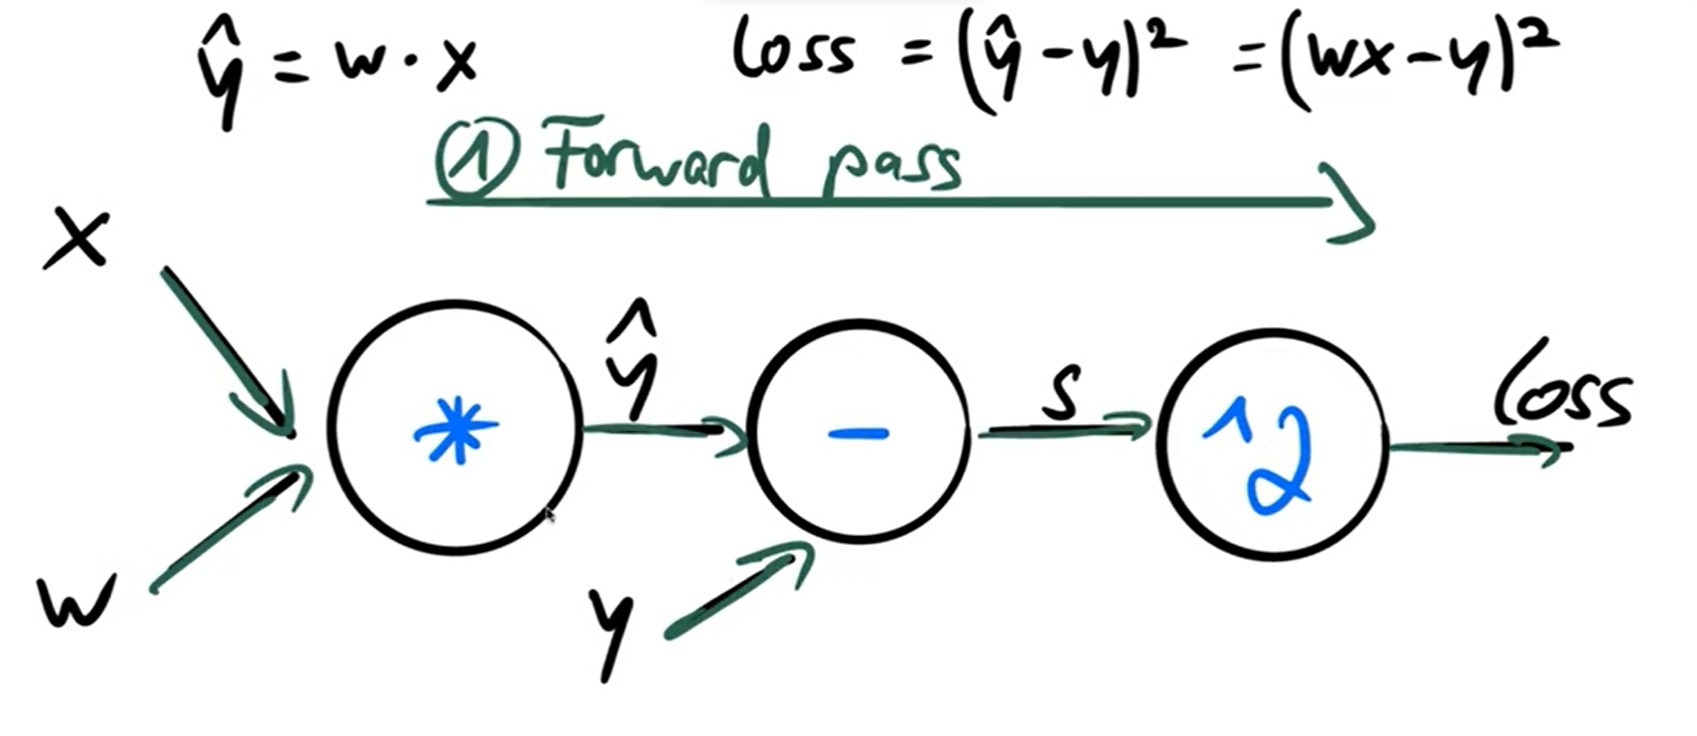
<br> Here we calculate the final output (loss function), (y' - y)^2

### Step 2
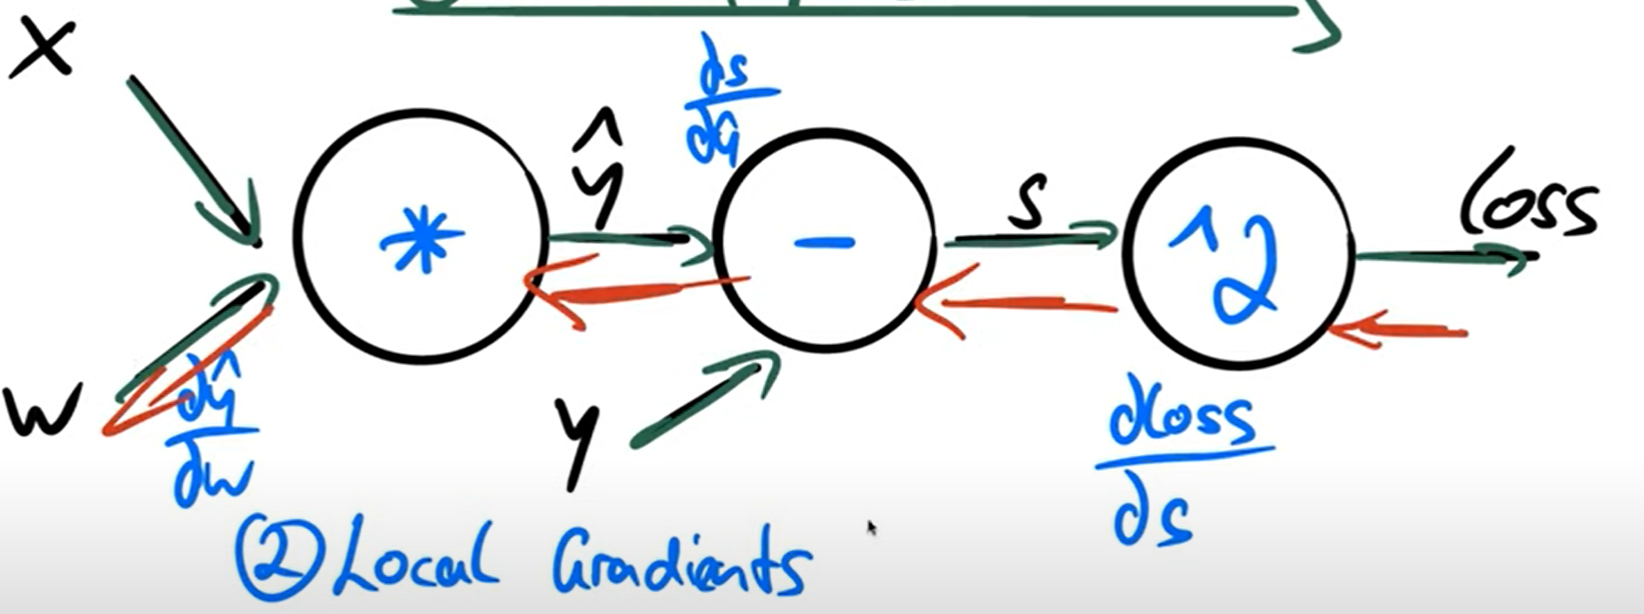

Here we calculate the local gradients at each step,


### Step 3
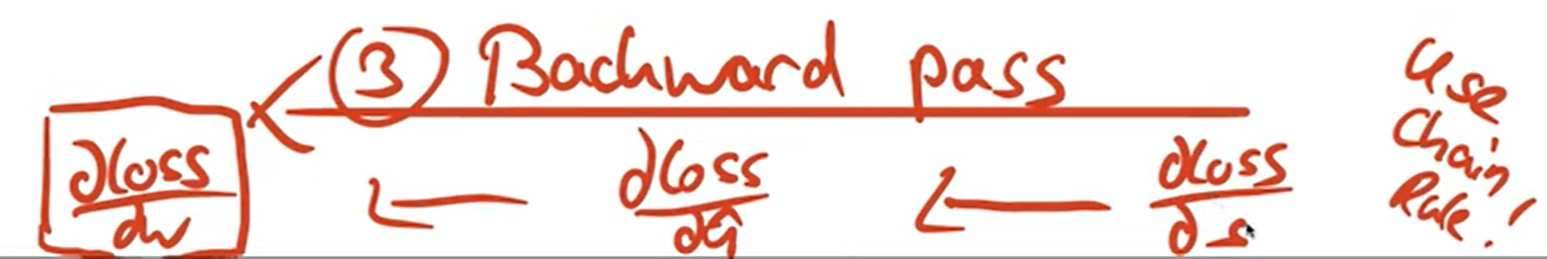
Apply chain rule to get the derivate of loss wrt w


---

*Example with numbers* <br>
suppose x=1, y=2, w=1

so y'=w * x = 1 * 1 = 1
<br>
then, subtraction operation, y'-y = -1 = s
then, squaring operation, (y'-y)^2 = 1 = loss = s^2

<br>
Now calculate partial gradients, <br>

so dLoss/ds = 2s <br>

Also, ds/dy' = 1 <br>

And, dy'/dw = x = 1
<br>

Nxt is step 3, backward pass <br>
So, dLoss/dw = 2s * 1 * x = 2s = -2

In [6]:
# Above using pytorch
import torch
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and computing the loss
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

# backward pass
loss.backward()
print(w.grad)


# update weights
# next forward and backpropogation steps...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


------

In [22]:
# GDA from scratch
import numpy as np
# f = w*x
# f = 2*x

X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)
w = 0.0 # initially

# model prediction
def forward(X):
    return w*X

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x (w*x - y)

def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    dw = gradient(X, Y, y_pred)
    
    w -= learning_rate*dw
    
    if epoch%1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')
         

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


---

In [34]:
# Now lets do gradient step using pytorch

import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(X):
    return w*X

def loss(y, y_predicted):
    return ((y-y_predicted)**2).mean()    

# def gradient
print(f'Prediction before training: f(5) = {forward(5):.3f}')

learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    # gradient calculation using backward pass
    l.backward() # calculates dl/dw
    
    # Now we need to make sure we dont track gradient in w updation
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        
    # also after each loop we shld empty the gradient otherwise it accumumlates
    w.grad.zero_()
    
    
    if epoch%10==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.150, loss = 7.50000000
epoch 11: w = 0.833, loss = 0.29069641
epoch 21: w = 0.967, loss = 0.01126722
epoch 31: w = 0.994, loss = 0.00043671
epoch 41: w = 0.999, loss = 0.00001693
epoch 51: w = 1.000, loss = 0.00000066
epoch 61: w = 1.000, loss = 0.00000003
epoch 71: w = 1.000, loss = 0.00000000
epoch 81: w = 1.000, loss = 0.00000000
epoch 91: w = 1.000, loss = 0.00000000
Prediction after training: f(5) = 5.000


In [38]:
# Now lets automate losses and weights updation using pytorch loss and optimizer classes, only model is manual
# steps - 
# 1. design model (input, output size, forward pass)
# 2. Construct loss and optimizer
# 3. Training loop - 
#    - forward pass : compute prediction
#    - backward pass : gradients calculation
#    - update weights

import torch
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([1, 2, 3, 4], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# def gradient
print(f'Prediction before training: f(5) = {forward(5):.3f}')

learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)


for epoch in range(n_iters):
    # Forward pass
    y_pred = forward(X)
    
    # Loss calculation
    l = loss(Y, y_pred)
    
    # gradient calculation using backward pass
    l.backward() # calculates dl/dw
    
    # update weights
    optimizer.step()

    # also after each loop we shld empty the gradient otherwise it accumumlates
    optimizer.zero_grad()
    
    # Printing data
    if epoch%10==0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epoch 1: w = 0.150, loss = 7.50000000
epoch 11: w = 0.833, loss = 0.29069641
epoch 21: w = 0.967, loss = 0.01126722
epoch 31: w = 0.994, loss = 0.00043671
epoch 41: w = 0.999, loss = 0.00001693
epoch 51: w = 1.000, loss = 0.00000066
epoch 61: w = 1.000, loss = 0.00000003
epoch 71: w = 1.000, loss = 0.00000000
epoch 81: w = 1.000, loss = 0.00000000
epoch 91: w = 1.000, loss = 0.00000000
Prediction after training: f(5) = 5.000


In [41]:
# Automating everything (model too)

import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

# def gradient
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


for epoch in range(n_iters):
    # Forward pass
    y_pred = model(X)
    
    # Loss calculation
    l = loss(Y, y_pred)
    
    # gradient calculation using backward pass
    l.backward() # calculates dl/dw
    
    # update weights
    optimizer.step()

    # also after each loop we shld empty the gradient otherwise it accumumlates
    optimizer.zero_grad()
    
    # Printing data
    if epoch%10==0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before training: f(5) = 5.000
epoch 1: w = 1.150, loss = 7.50000334
epoch 11: w = 1.833, loss = 0.29069635
epoch 21: w = 1.967, loss = 0.01126729
epoch 31: w = 1.994, loss = 0.00043671
epoch 41: w = 1.999, loss = 0.00001693
epoch 51: w = 2.000, loss = 0.00000066
epoch 61: w = 2.000, loss = 0.00000003
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000
